Dataset Preview:
   Student  Xi  Yi
0        1  95  85
1        2  85  95
2        3  80  70
3        4  70  65
4        5  60  70
Regression Equation: grade = 0.64 * test_score + 26.78
R-squared value: 0.48
Predicted grade for a student with test score 80: 78.29


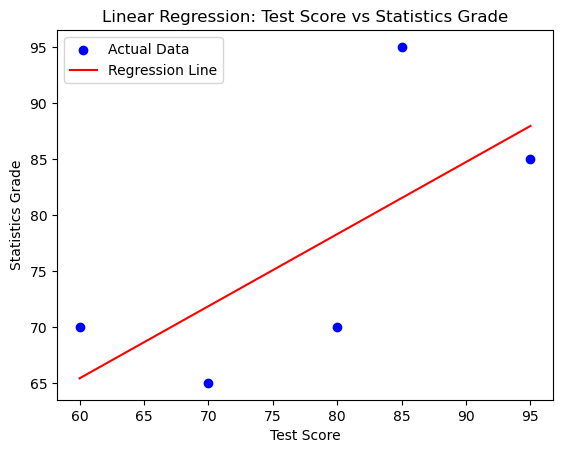

R-squared value (calculated using sklearn): 0.48


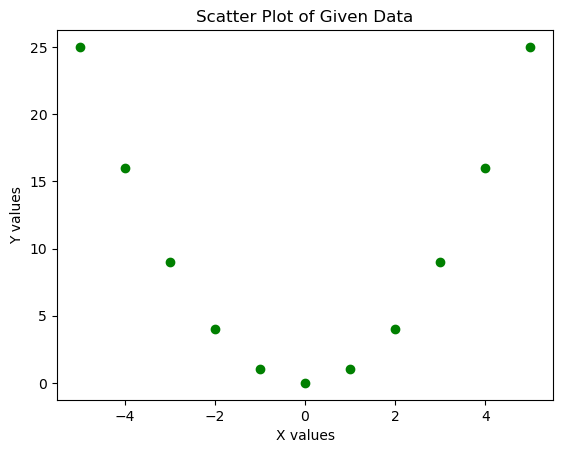

Based on the scatter plot, the data follows a quadratic pattern (parabolic shape),
so a quadratic regression model would be the best fit.
Cleaned Heart Disease Dataset Preview:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  result  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
Linear Regression - Mean Squared Error (MSE): 0.82
Linear Regression - R-squared: 0.48
Feature Importance:
     Feature  Coefficient
11        ca     0.434349
1        sex     0.27

In [ ]:
# Exercise 1: Linear Regression for Student Performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import zipfile


student_data = pd.read_csv(r"C:\Users\makif\Desktop\New folder (2)\Dataset student_score.csv")

print("Dataset Preview:")
print(student_data.head())

test_scores = student_data['Xi'].values.reshape(-1, 1)
grades = student_data['Yi'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(test_scores.flatten(), grades)

print(f"Regression Equation: grade = {slope:.2f} * test_score + {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")

score_to_predict = 80
predicted_grade = slope * score_to_predict + intercept
print(f"Predicted grade for a student with test score {score_to_predict}: {predicted_grade:.2f}")


# Exercise 2: Plot the Regression Line

plt.scatter(test_scores, grades, color='blue', label="Actual Data")

plt.plot(test_scores, slope * test_scores + intercept, color='red', label="Regression Line")
plt.xlabel("Test Score")
plt.ylabel("Statistics Grade")
plt.title("Linear Regression: Test Score vs Statistics Grade")
plt.legend()
plt.show()



# Exercise 3: Calculate R-Squared Using scikit-learn

regression_model = LinearRegression()
regression_model.fit(test_scores, grades)
predicted_grades = regression_model.predict(test_scores)
r_squared = r2_score(grades, predicted_grades)
print(f"R-squared value (calculated using sklearn): {r_squared:.2f}")



# Exercise 4: Scatter Plot and Regression Model Type

x_values = np.array([-4, -2, 1, 3, -1, -5, 4, 2, 0, -3, 5])
y_values = np.array([16, 4, 1, 9, 1, 25, 16, 4, 0, 9, 25])

plt.scatter(x_values, y_values, color='green')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter Plot of Given Data")
plt.show()

print("Based on the scatter plot, the data follows a quadratic pattern (parabolic shape),")
print("so a quadratic regression model would be the best fit.")



# Exercise 5: Heart Disease Dataset Analysis

zip_file_path = r"C:\Users\makif\Desktop\New folder (2)\heart+disease.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\makif\Desktop\New folder (2)\heart_disease")

data_path = r"C:\Users\makif\Desktop\New folder (2)\heart_disease\processed.cleveland.data"

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result'
]

heart_data = pd.read_csv(data_path, header=None, names=columns)

heart_data.replace('?', np.nan, inplace=True)
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

heart_data.dropna(inplace=True)

print("Cleaned Heart Disease Dataset Preview:")
print(heart_data.head())

features = heart_data.iloc[:, :-1]

target = heart_data['result']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

linear_model = LinearRegression()
linear_model.fit(features_train, target_train)
linear_predictions = linear_model.predict(features_test)

mse_linear = mean_squared_error(target_test, linear_predictions)  
r2_linear = r2_score(target_test, linear_predictions)  

print(f"Linear Regression - Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Linear Regression - R-squared: {r2_linear:.2f}")

feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Feature Importance:")
print(feature_importance)

binary_target = (target > 0).astype(int)

features_train, features_test, binary_train, binary_test = train_test_split(
    features, binary_target, test_size=0.2, random_state=42
)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(features_train, binary_train)
logistic_predictions = logistic_model.predict(features_test)
accuracy = accuracy_score(binary_test, logistic_predictions) 

print(f"Logistic Regression - Accuracy: {accuracy:.2f}")

print("\nModel Comparison:")
print(f"Linear Regression - MSE: {mse_linear:.2f}, R-squared: {r2_linear:.2f}")
print(f"Logistic Regression - Accuracy: {accuracy:.2f}")



